In [3]:
import nltk          #pip install nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get POS tag for lemmatization
def get_pos_tag(tag): 
    if tag.startswith('NN'):
        return wordnet.NOUN
    elif tag.startswith('VB'):
        return wordnet.VERB
    elif tag.startswith('JJ'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

# Example sentence
sentence = "The cats were running in the park, and their happiness was growing."

# Tokenize the sentence into words
words = word_tokenize(sentence)

# Get POS tags for the words
pos_tags = nltk.pos_tag(words)

# Lemmatization (reduce words to base form with correct POS tag)
lemmatized_words = [lemmatizer.lemmatize(word, get_pos_tag(tag)) for word, tag in pos_tags]

# Print results
print("Original sentence:", sentence)
print("Tokenized words:", words)
print("POS tags:", pos_tags)
print("Lemmatized words:", lemmatized_words)


Original sentence: The cats were running in the park, and their happiness was growing.
Tokenized words: ['The', 'cats', 'were', 'running', 'in', 'the', 'park', ',', 'and', 'their', 'happiness', 'was', 'growing', '.']
Lemmatized words: ['The', 'cat', 'were', 'running', 'in', 'the', 'park', ',', 'and', 'their', 'happiness', 'wa', 'growing', '.']
Stemmed words: ['the', 'cat', 'were', 'run', 'in', 'the', 'park', ',', 'and', 'their', 'happi', 'wa', 'grow', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Word list for testing
words = ['playing', 'played', 'replay', 'kindness', 'unkind']

# Suffixes and prefixes to check
suffixes = ['ing', 'ed', 'ness']
prefixes = ['re', 'un']

print("Add Table:")
for word in words:
    for suffix in suffixes:
        if word.endswith(suffix):
            root = word[:-len(suffix)]
            print(f"Root: {root} + {suffix} = {word}")
    for prefix in prefixes:
        if word.startswith(prefix):
            root = word[len(prefix):]
            print(f"Root: {root} + {prefix} = {word}")

print("\nDelete Table:")
for word in words:
    for suffix in suffixes:
        if word.endswith(suffix):
            root = word[:-len(suffix)]
            print(f"{word} - {suffix} = {root}")
    for prefix in prefixes:
        if word.startswith(prefix):
            root = word[len(prefix):]
            print(f"{word} - {prefix} = {root}")


Add Table:
Root: play + ing = playing
Root: play + ed = played
Root: play + re = replay
Root: kind + ness = kindness
Root: kind + un = unkind

Delete Table:
playing - ing = play
played - ed = play
replay - re = play
kindness - ness = kind
unkind - un = kind


In [8]:
# Step 1: Import the necessary library
import spacy

# Step 2: Load the pre-trained model
# Load the small English model from spaCy (en_core_web_sm)
# This model can process text and assign POS tags to words
nlp = spacy.load("en_core_web_sm")

# Step 3: Define the text for POS tagging
# We will use a simple sentence as an example for demonstration
text = "The quick brown fox jumps over the lazy dog."

# Step 4: Process the text
# The text is passed through the spaCy NLP pipeline to process it.
# This will tokenize the sentence and assign linguistic annotations
# like part-of-speech tags, syntactic dependencies, and more.
doc = nlp(text)

# Step 5: Iterate through each token (word) in the processed document
# Each token has various properties, including its text and part-of-speech tag.
# We will print out the text (word) along with its POS tag.
print("POS Tagging Result:\n")
for token in doc:
    print(f"Word: {token.text} | POS Tag: {token.pos_}")

# Optional: Print the full sentence with detailed POS tagging for understanding
print("\nDetailed POS Tagging for each token:\n")
for token in doc:
    print(f"Token: {token.text}, POS Tag: {token.pos_}, Tag Description: {token.tag_}")

# Step 6: Additional Information (Optional)
# You can also print out additional information about the token such as:
# - token.dep_ (syntactic dependency)
# - token.lemma_ (base form of the word)
# - token.is_stop (whether the token is a stop word or not)

print("\nAdditional Information for Tokens:\n")
for token in doc:
    print(f"Token: {token.text}, Lemma: {token.lemma_}, Dependency: {token.dep_}, Is Stop Word: {token.is_stop}")


POS Tagging Result:

Word: The | POS Tag: DET
Word: quick | POS Tag: ADJ
Word: brown | POS Tag: ADJ
Word: fox | POS Tag: NOUN
Word: jumps | POS Tag: VERB
Word: over | POS Tag: ADP
Word: the | POS Tag: DET
Word: lazy | POS Tag: ADJ
Word: dog | POS Tag: NOUN
Word: . | POS Tag: PUNCT

Detailed POS Tagging for each token:

Token: The, POS Tag: DET, Tag Description: DT
Token: quick, POS Tag: ADJ, Tag Description: JJ
Token: brown, POS Tag: ADJ, Tag Description: JJ
Token: fox, POS Tag: NOUN, Tag Description: NN
Token: jumps, POS Tag: VERB, Tag Description: VBZ
Token: over, POS Tag: ADP, Tag Description: IN
Token: the, POS Tag: DET, Tag Description: DT
Token: lazy, POS Tag: ADJ, Tag Description: JJ
Token: dog, POS Tag: NOUN, Tag Description: NN
Token: ., POS Tag: PUNCT, Tag Description: .

Additional Information for Tokens:

Token: The, Lemma: the, Dependency: det, Is Stop Word: True
Token: quick, Lemma: quick, Dependency: amod, Is Stop Word: False
Token: brown, Lemma: brown, Dependency: amod,

In [10]:
# Step 1: Install NLTK and download necessary data
# You can install NLTK using the following command in the terminal or command prompt:
# pip install nltk

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: for multilingual WordNet

# Step 2: Import WordNet from NLTK
from nltk.corpus import wordnet as wn

# Step 3: Define a function to get semantic relationships in a simplified format
def get_semantic_relationships(word1, word2):
    # Get synsets (sets of synonyms) for the words
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    
    # Check if synsets exist for both words
    if not synsets1 or not synsets2:
        return f"Could not find semantic relationships for '{word1}' and '{word2}'."
    
    # Take the first synset for each word
    synset1 = synsets1[0]
    synset2 = synsets2[0]

    # Extract simplified relationships
    relationships = {
        "Word 1": word1,
        "Word 2": word2,
        "Definition of Word 1": synset1.definition(),
        "Definition of Word 2": synset2.definition(),
        "Similarity Score (Wu-Palmer)": synset1.wup_similarity(synset2),  # Similarity Score
        "Hypernyms of Word 1": ', '.join([lemma.name() for hypernym in synset1.hypernyms() for lemma in hypernym.lemmas()]),
        "Hypernyms of Word 2": ', '.join([lemma.name() for hypernym in synset2.hypernyms() for lemma in hypernym.lemmas()]),
    }

    return relationships

# Example Usage
word1 = "dog"
word2 = "cat"
semantic_relationships = get_semantic_relationships(word1, word2)

# Print the simplified semantic relationships
for key, value in semantic_relationships.items():
    print(f"{key}: {value}")


Word 1: dog
Word 2: cat
Definition of Word 1: a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
Definition of Word 2: feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
Similarity Score (Wu-Palmer): 0.8571428571428571
Hypernyms of Word 1: canine, canid, domestic_animal, domesticated_animal
Hypernyms of Word 2: feline, felid


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
# Step 1: Install NLTK and download necessary resources
# pip install nltk

import nltk
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TweetTokenizer, MWETokenizer, TreebankWordTokenizer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download NLTK resources
nltk.download('wordnet')
nltk.download('punkt')

# Sample sentence
sentence = "The quick brown fox, jumping swiftly, wasn't afraid of the lazy dog! #nature #wildlife"

# Step 2: Tokenization Techniques
whitespace_tokenizer = WhitespaceTokenizer()
word_punct_tokenizer = WordPunctTokenizer()
tweet_tokenizer = TweetTokenizer()
treebank_tokenizer = TreebankWordTokenizer()

# Multi-Word Expression Tokenizer (MWE)
mwe_tokenizer = MWETokenizer([("quick", "brown"), ("lazy", "dog")])

# Apply tokenizers
tokens_whitespace = whitespace_tokenizer.tokenize(sentence)
tokens_punct = word_punct_tokenizer.tokenize(sentence)
tokens_tweet = tweet_tokenizer.tokenize(sentence)
tokens_treebank = treebank_tokenizer.tokenize(sentence)
tokens_mwe = mwe_tokenizer.tokenize(sentence.split())

# Display tokenization results
print("Whitespace Tokenizer:", tokens_whitespace)
print("Punctuation-based Tokenizer:", tokens_punct)
print("Tweet Tokenizer:", tokens_tweet)
print("Treebank Tokenizer:", tokens_treebank)
print("MWE Tokenizer:", tokens_mwe)

# Step 3: Stemming (Porter and Snowball)
porter = PorterStemmer()
snowball = SnowballStemmer("english")

# Stemming with Porter and Snowball
porter_stems = [porter.stem(token) for token in tokens_whitespace]
snowball_stems = [snowball.stem(token) for token in tokens_whitespace]

print("\nPorter Stemmer:", porter_stems)
print("Snowball Stemmer:", snowball_stems)

# Step 4: Lemmatization using WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization (using verb 'v' as POS)
lemmatized = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens_whitespace]

print("\nLemmatized Tokens:", lemmatized)


Whitespace Tokenizer: ['The', 'quick', 'brown', 'fox,', 'jumping', 'swiftly,', "wasn't", 'afraid', 'of', 'the', 'lazy', 'dog!', '#nature', '#wildlife']
Punctuation-based Tokenizer: ['The', 'quick', 'brown', 'fox', ',', 'jumping', 'swiftly', ',', 'wasn', "'", 't', 'afraid', 'of', 'the', 'lazy', 'dog', '!', '#', 'nature', '#', 'wildlife']
Tweet Tokenizer: ['The', 'quick', 'brown', 'fox', ',', 'jumping', 'swiftly', ',', "wasn't", 'afraid', 'of', 'the', 'lazy', 'dog', '!', '#nature', '#wildlife']
Treebank Tokenizer: ['The', 'quick', 'brown', 'fox', ',', 'jumping', 'swiftly', ',', 'was', "n't", 'afraid', 'of', 'the', 'lazy', 'dog', '!', '#', 'nature', '#', 'wildlife']
MWE Tokenizer: ['The', 'quick_brown', 'fox,', 'jumping', 'swiftly,', "wasn't", 'afraid', 'of', 'the', 'lazy', 'dog!', '#nature', '#wildlife']

Porter Stemmer: ['the', 'quick', 'brown', 'fox,', 'jump', 'swiftly,', "wasn't", 'afraid', 'of', 'the', 'lazi', 'dog!', '#natur', '#wildlif']
Snowball Stemmer: ['the', 'quick', 'brown', 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhumi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed Tokens: ['love', 'natural', 'language', 'processing', 'natural', 'language', 'processing', 'interesting']

Top 5 Unigrams: [(('natural',), 2), (('language',), 2), (('processing',), 2), (('love',), 1), (('interesting',), 1)]

Top 5 Bigrams: [(('natural', 'language'), 2), (('language', 'processing'), 2), (('love', 'natural'), 1), (('processing', 'natural'), 1), (('processing', 'interesting'), 1)]

Top 5 Trigrams: [(('natural', 'language', 'processing'), 2), (('love', 'natural', 'language'), 1), (('language', 'processing', 'natural'), 1), (('processing', 'natural', 'language'), 1), (('language', 'processing', 'interesting'), 1)]


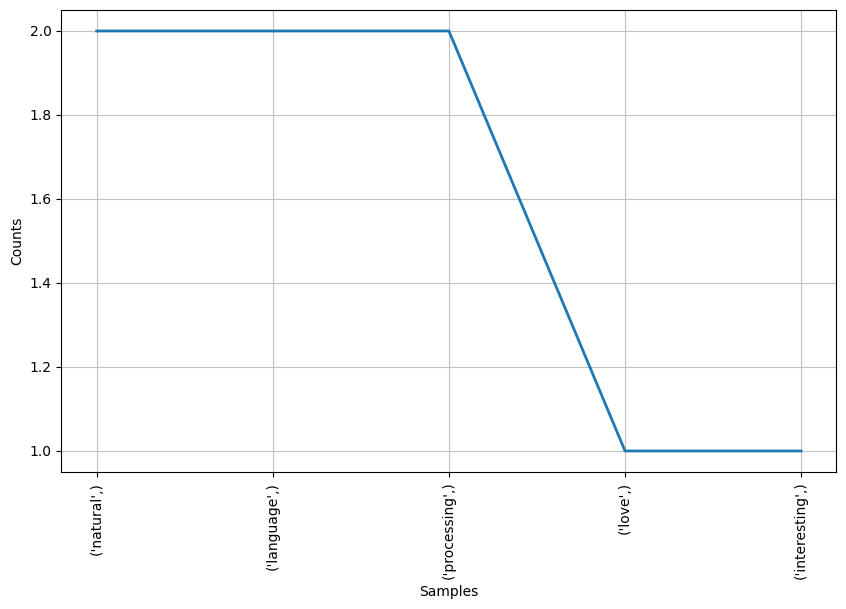

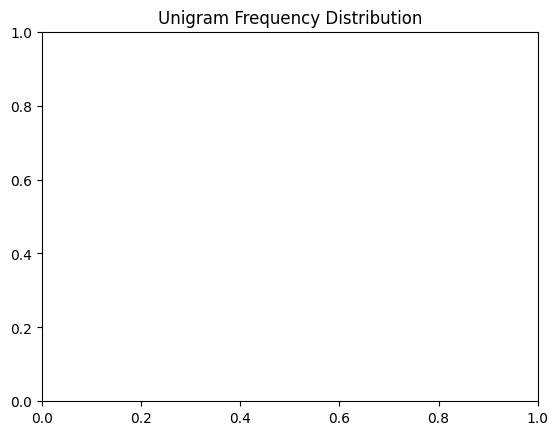

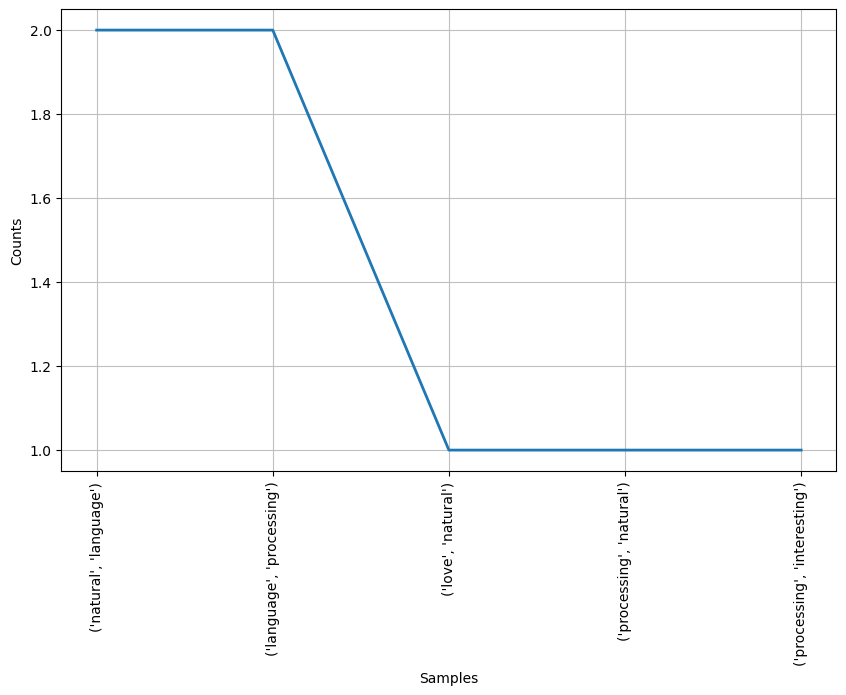

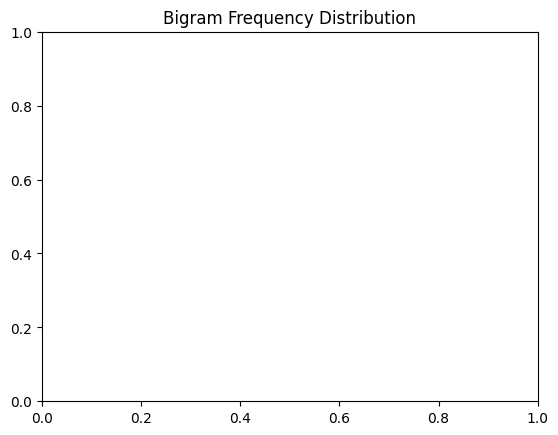

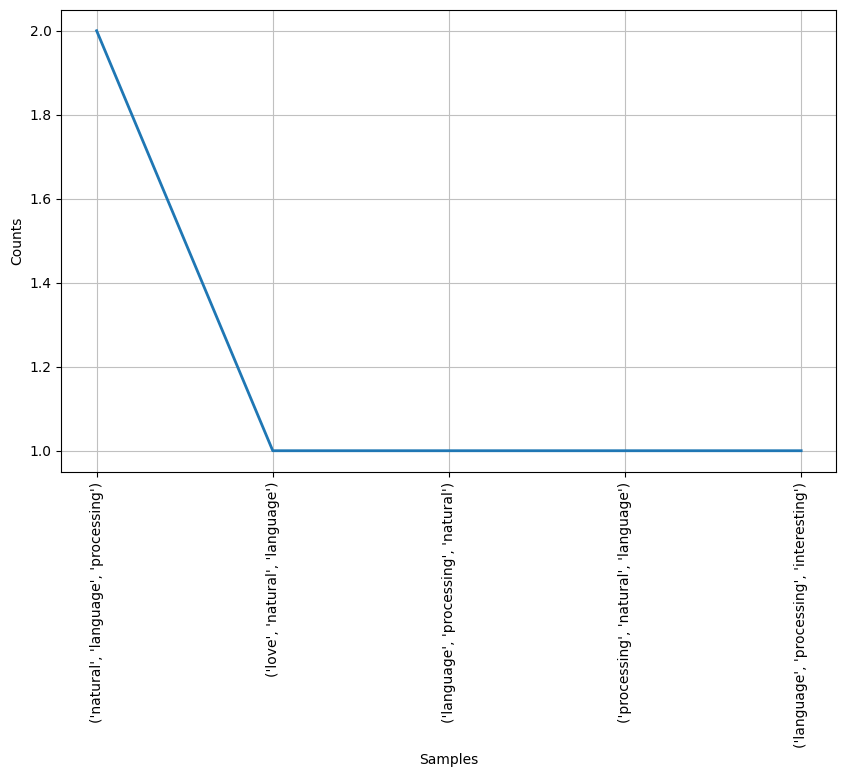

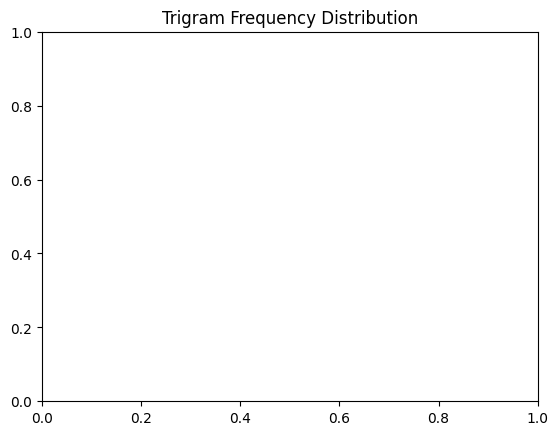


Bag-of-Words Features: ['interesting' 'is' 'language' 'love' 'natural' 'processing' 'very']

TF-IDF Features: ['interesting' 'is' 'language' 'love' 'natural' 'processing' 'very']


In [12]:
# Install necessary libraries
# pip install nltk matplotlib sklearn

import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample Text
text = "I love natural language processing. Natural language processing is very interesting."

# Step 1: Data Preprocessing
# Convert text to lowercase
text = text.lower()

# Tokenization
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# Lemmatization
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

print(f"Processed Tokens: {tokens}")

# Step 2: Generating N-Grams (Unigrams, Bigrams, Trigrams)
# Unigrams (N=1)
unigrams = ngrams(tokens, 1)

# Bigrams (N=2)
bigrams = ngrams(tokens, 2)

# Trigrams (N=3)
trigrams = ngrams(tokens, 3)

# Step 3: Frequency Distribution of N-Grams
unigram_freq = FreqDist(unigrams)
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

# Display top 5 frequent unigrams, bigrams, and trigrams
print("\nTop 5 Unigrams:", unigram_freq.most_common(5))
print("\nTop 5 Bigrams:", bigram_freq.most_common(5))
print("\nTop 5 Trigrams:", trigram_freq.most_common(5))

# Step 4: Visualizing N-Grams Frequency
def plot_freq_dist(freq_dist, title):
    plt.figure(figsize=(10, 6))
    freq_dist.plot(30, cumulative=False)
    plt.title(title)
    plt.show()

# Plot frequency distributions
plot_freq_dist(unigram_freq, 'Unigram Frequency Distribution')
plot_freq_dist(bigram_freq, 'Bigram Frequency Distribution')
plot_freq_dist(trigram_freq, 'Trigram Frequency Distribution')

# Step 5: Comparison with Bag-of-Words (BoW) and TF-IDF
# Bag-of-Words Model
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform([text])
print("\nBag-of-Words Features:", vectorizer.get_feature_names_out())

# TF-IDF Model
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform([text])
print("\nTF-IDF Features:", tfidf_vectorizer.get_feature_names_out())



In [15]:
import spacy
from sklearn.metrics import precision_score, recall_score, f1_score

# Load pre-trained spaCy NER model (en_core_web_sm)
nlp = spacy.load('en_core_web_sm')

# Example Text
text = """Barack Obama was born on August 4, 1961, in Honolulu, Hawaii. 
He served as the 44th president of the United States, from 2009 to 2017. 
His favorite restaurant is The French Laundry in Yountville, California."""

# Step 1: Process the Text
doc = nlp(text)

# Step 2: Extract Entities and Classify them
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Extracted Entities:")
for entity in entities:
    print(f"{entity[0]} ({entity[1]})")

# Step 3: Evaluate the Model using Precision, Recall, F1-Score
# Define ground truth entities (for evaluation purposes)
true_entities = [
    ("Barack Obama", "PERSON"),
    ("August 4, 1961", "DATE"),
    ("Honolulu", "LOCATION"),
    ("Hawaii", "LOCATION"),
    ("44th president of the United States", "ORG"),
    ("2009 to 2017", "DATE"),
    ("The French Laundry", "ORG"),
    ("Yountville", "LOCATION"),
    ("California", "LOCATION")
]

# Extract entities and labels from the predicted output
pred_entities = [entity[0] for entity in entities]
pred_labels = [entity[1] for entity in entities]

# Extract entities and labels from the true output
true_entities_text = [entity[0] for entity in true_entities]
true_labels = [entity[1] for entity in true_entities]

# Step 4: Align True Labels with Predicted Labels by Checking if Entity Texts Match
aligned_true_labels = []
aligned_pred_labels = []

for t_entity, p_entity in zip(true_entities, entities):
    if t_entity[0] == p_entity[0]:
        aligned_true_labels.append(t_entity[1])
        aligned_pred_labels.append(p_entity[1])

# Step 5: Compute Precision, Recall, F1-Score
precision = precision_score(aligned_true_labels, aligned_pred_labels, average='weighted', zero_division=0)
recall = recall_score(aligned_true_labels, aligned_pred_labels, average='weighted', zero_division=0)
f1 = f1_score(aligned_true_labels, aligned_pred_labels, average='weighted', zero_division=0)

# Print performance metrics
print("\nModel Evaluation:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Extracted Entities:
Barack Obama (PERSON)
August 4, 1961 (DATE)
Honolulu (GPE)
Hawaii (GPE)
44th (ORDINAL)
the United States (GPE)
2009 (DATE)
The French Laundry (ORG)
Yountville (GPE)
California (GPE)

Model Evaluation:
Precision: 0.50
Recall: 0.50
F1-Score: 0.50


In [14]:
# Install necessary libraries
# pip install spacy

import spacy

# Load pre-trained spaCy NER model (en_core_web_sm)
nlp = spacy.load('en_core_web_sm')

# Example Text for NER
text = """Elon Musk, the CEO of SpaceX, was born in Pretoria, South Africa. 
He moved to the United States in 1992 and later founded Tesla Inc. 
Tesla's stock is worth $800 per share. Musk is also known for his work on Neuralink and The Boring Company."""

# Step 1: Process the Text using spaCy
doc = nlp(text)

# Step 2: Extract and classify named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Step 3: Print extracted entities and their classification
print("Extracted Entities:")
for entity in entities:
    print(f"{entity[0]} ({entity[1]})")



Extracted Entities:
Elon Musk (PERSON)
SpaceX (PERSON)
Pretoria (GPE)
South Africa (GPE)
the United States (GPE)
1992 (DATE)
Tesla Inc. (ORG)
Tesla (ORG)
800 (MONEY)
Neuralink and The Boring Company (WORK_OF_ART)
